In [73]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix

sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [4]:
''' reading dataset '''
df = pd.read_csv('Churn_Modelling.csv')

In [5]:
''' displaying first 5 rows '''
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
''' shape of data '''
df.shape

(10000, 14)

In [7]:
''' chcecking null values '''
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
''' checking info '''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


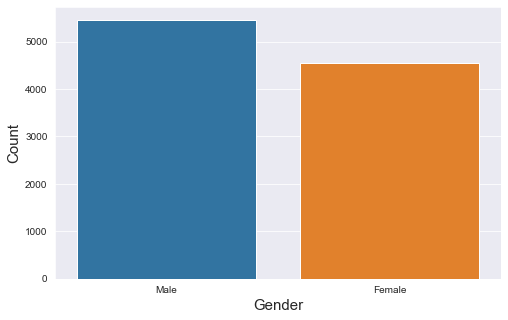

In [13]:
''' value counts of Gender '''
gender_lbl = df.Gender.value_counts()

''' barplot '''
plt.figure(figsize=(8, 5))
sns.barplot(gender_lbl.index, gender_lbl);
plt.xlabel('Gender', fontsize=15);
plt.ylabel('Count', fontsize=15);

In [14]:
''' dropping some rows '''
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [15]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [25]:
''' independent and dependent features '''
X = df.iloc[:, :10]
y = df.iloc[:, 10]

In [26]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10


In [27]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [28]:
''' one-hot encoding of gender column '''
df['Gender'] = np.where(df['Gender'] == 'Male', 1, 0)

In [29]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [30]:
''' unique value in geography '''
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [31]:
''' dummies values '''
geography = pd.get_dummies(X["Geography"], drop_first=True)

In [36]:
''' concatenating geography and X '''
X = pd.concat([X, geography], axis=1)

In [37]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain
0,619,France,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,France,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,1


In [40]:
''' dropping Geography column '''
X.drop(['Geography'], axis=1, inplace=True)

In [41]:
''' final data '''
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1


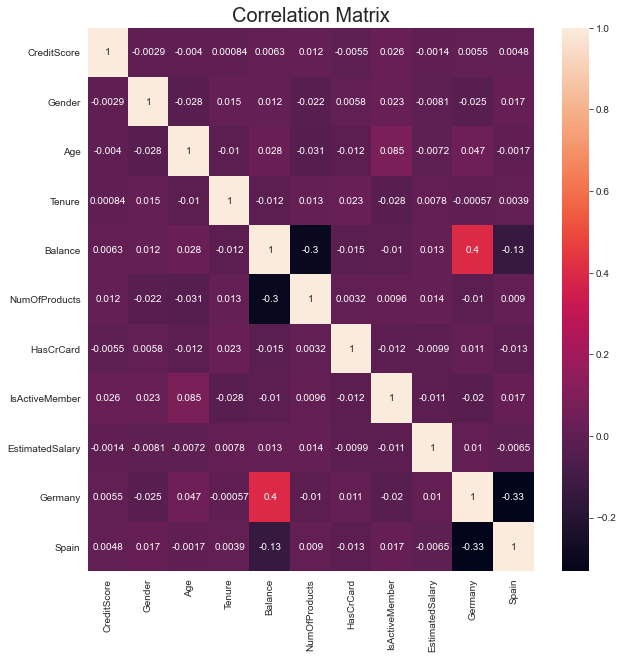

In [42]:
''' correlation matrix '''
plt.figure(figsize=(10, 10))
sns.heatmap(X.corr(), annot=True)
plt.title('Correlation Matrix', fontsize=20);

In [44]:
''' train test split '''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [45]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (7500, 11)
X_test shape:  (2500, 11)


In [48]:
''' Scaling '''
min_max_sc = MinMaxScaler()

X_train = min_max_sc.fit_transform(X_train)
X_test = min_max_sc.transform(X_test)

In [49]:
X_train

array([[0.458     , 0.        , 0.31343284, ..., 0.02909988, 1.        ,
        0.        ],
       [0.8       , 0.        , 0.20895522, ..., 0.4780451 , 0.        ,
        0.        ],
       [0.758     , 0.        , 0.23880597, ..., 0.21424241, 0.        ,
        1.        ],
       ...,
       [0.776     , 1.        , 0.25373134, ..., 0.90717809, 0.        ,
        0.        ],
       [0.48      , 0.        , 0.29850746, ..., 0.74376393, 0.        ,
        1.        ],
       [0.546     , 0.        , 0.44776119, ..., 0.59427515, 1.        ,
        0.        ]])

In [50]:
X_test

array([[0.494     , 0.        , 0.25373134, ..., 0.96429754, 1.        ,
        0.        ],
       [0.346     , 0.        , 0.32835821, ..., 0.64351406, 0.        ,
        0.        ],
       [0.712     , 0.        , 0.35820896, ..., 0.37863951, 0.        ,
        1.        ],
       ...,
       [0.98      , 0.        , 0.31343284, ..., 0.42242054, 0.        ,
        0.        ],
       [0.658     , 1.        , 0.29850746, ..., 0.23257771, 1.        ,
        0.        ],
       [0.77      , 1.        , 0.19402985, ..., 0.36461532, 0.        ,
        0.        ]])

In [52]:
''' Model '''

''' container '''
model = Sequential()

''' 1st Hidden Layer '''
model.add(Dense(units = 6, kernel_initializer='he_uniform',activation='relu',input_dim = 11))

''' 2nd Hidden Layer '''
model.add(Dense(units = 6, kernel_initializer='he_uniform', activation='relu'))

''' Classification Layer '''
model.add(Dense(units = 1, kernel_initializer='glorot_uniform', activation='sigmoid'))

In [53]:
''' lets see how model looks like '''
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [54]:
''' compile the model '''
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [55]:
''' training '''
history = model.fit(X_train, y_train, validation_split=0.33, batch_size = 10, epochs= 100)

Epoch 1/100
503/503 [==============================] - 9s 8ms/step - loss: 0.7113 - accuracy: 0.5932 - val_loss: 0.4829 - val_accuracy: 0.7985
Epoch 2/100
503/503 [==============================] - 3s 6ms/step - loss: 0.4888 - accuracy: 0.7970 - val_loss: 0.4736 - val_accuracy: 0.8009
Epoch 3/100
503/503 [==============================] - 3s 6ms/step - loss: 0.4799 - accuracy: 0.7943 - val_loss: 0.4670 - val_accuracy: 0.8017
Epoch 4/100
503/503 [==============================] - 2s 5ms/step - loss: 0.4603 - accuracy: 0.8054 - val_loss: 0.4596 - val_accuracy: 0.8045
Epoch 5/100
503/503 [==============================] - 3s 5ms/step - loss: 0.4571 - accuracy: 0.8039 - val_loss: 0.4530 - val_accuracy: 0.8053
Epoch 6/100
503/503 [==============================] - 2s 4ms/step - loss: 0.4575 - accuracy: 0.7974 - val_loss: 0.4472 - val_accuracy: 0.8021
Epoch 7/100
503/503 [==============================] - 2s 4ms/step - loss: 0.4306 - accuracy: 0.8105 - val_loss: 0.4420 - val_accuracy: 0.8078

Epoch 58/100
503/503 [==============================] - 2s 4ms/step - loss: 0.3722 - accuracy: 0.8404 - val_loss: 0.3852 - val_accuracy: 0.8368
Epoch 59/100
503/503 [==============================] - 2s 5ms/step - loss: 0.3610 - accuracy: 0.8439 - val_loss: 0.3852 - val_accuracy: 0.8364
Epoch 60/100
503/503 [==============================] - 2s 4ms/step - loss: 0.3703 - accuracy: 0.8402 - val_loss: 0.3855 - val_accuracy: 0.8344
Epoch 61/100
503/503 [==============================] - 3s 5ms/step - loss: 0.3713 - accuracy: 0.8411 - val_loss: 0.3841 - val_accuracy: 0.8380
Epoch 62/100
503/503 [==============================] - 2s 3ms/step - loss: 0.3549 - accuracy: 0.8480 - val_loss: 0.3840 - val_accuracy: 0.8372
Epoch 63/100
503/503 [==============================] - 2s 3ms/step - loss: 0.3574 - accuracy: 0.8490 - val_loss: 0.3874 - val_accuracy: 0.8328
Epoch 64/100
503/503 [==============================] - 2s 3ms/step - loss: 0.3595 - accuracy: 0.8519 - val_loss: 0.3837 - val_accuracy:

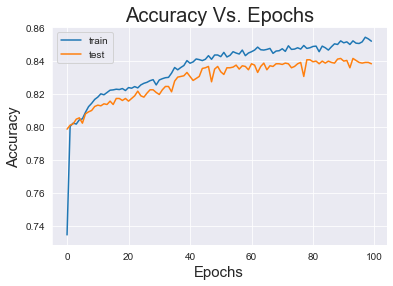

In [57]:
''' training accuracy and validation accuracy graph '''
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Vs. Epochs', fontsize=20)
plt.ylabel('Accuracy', fontsize=15)
plt.xlabel('Epochs', fontsize=15)
plt.legend(['train', 'test'], loc='upper left');

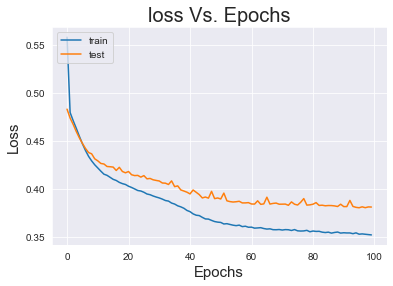

In [58]:
''' training loss and validation loss graph '''
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss Vs. Epochs', fontsize=20)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epochs', fontsize=15)
plt.legend(['train', 'test'], loc='upper left');

In [59]:
''' prediction '''
pred = model.predict(X_test)

In [67]:
preds = []

for p in pred:
    if p > 0.5:
        preds.append(1)
    else:
        preds.append(0)

In [71]:
pd.DataFrame({
    'Actual': y_test, 
    'Predicted': preds
}).head(50)

,Actual,Predicted
9394,0,0
898,1,0
2398,0,0
5906,0,0
2343,0,0
8225,1,1
5506,0,0
6451,0,0
2670,1,0
3497,1,1


In [74]:
print("Accuracy Score: ", accuracy_score(y_test, preds))

Accuracy Score:  0.8448


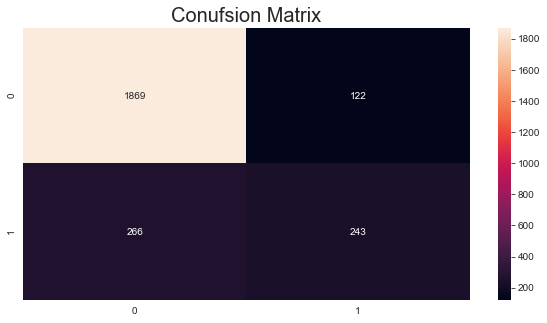

In [77]:
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='g');
plt.title('Conufsion Matrix', fontsize=20);